Dataset shape: (4424, 37)

Actual column names in the dataset:
- 'Marital status'
- 'Application mode'
- 'Application order'
- 'Course'
- 'Daytime/evening attendance	'
- 'Previous qualification'
- 'Previous qualification (grade)'
- 'Nacionality'
- 'Mother's qualification'
- 'Father's qualification'
- 'Mother's occupation'
- 'Father's occupation'
- 'Admission grade'
- 'Displaced'
- 'Educational special needs'
- 'Debtor'
- 'Tuition fees up to date'
- 'Gender'
- 'Scholarship holder'
- 'Age at enrollment'
- 'International'
- 'Curricular units 1st sem (credited)'
- 'Curricular units 1st sem (enrolled)'
- 'Curricular units 1st sem (evaluations)'
- 'Curricular units 1st sem (approved)'
- 'Curricular units 1st sem (grade)'
- 'Curricular units 1st sem (without evaluations)'
- 'Curricular units 2nd sem (credited)'
- 'Curricular units 2nd sem (enrolled)'
- 'Curricular units 2nd sem (evaluations)'
- 'Curricular units 2nd sem (approved)'
- 'Curricular units 2nd sem (grade)'
- 'Curricular units 2nd 

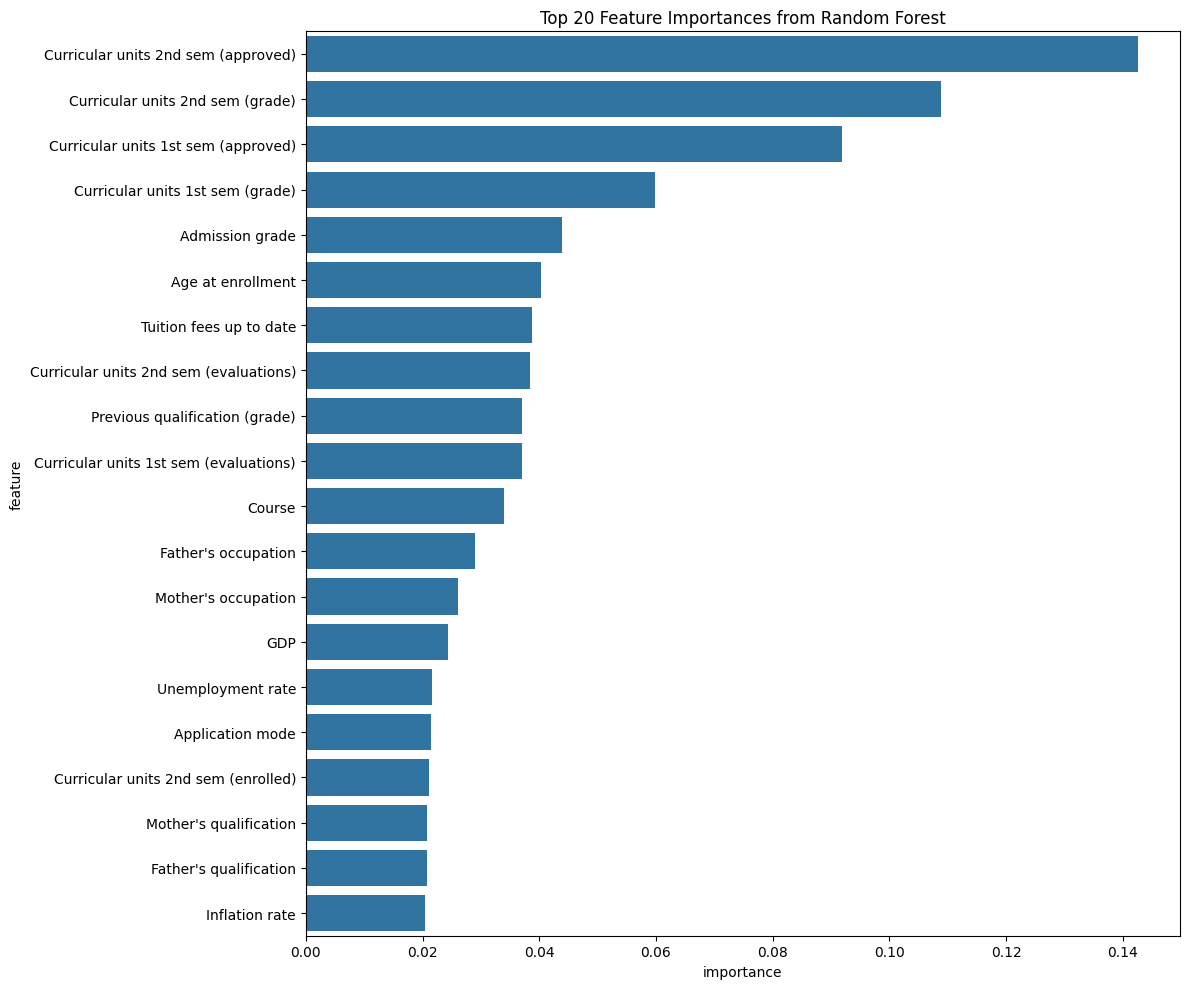


Calculating permutation importance (this may take a while)...

Top 20 features by permutation importance:
                                           feature  importance
30             Curricular units 2nd sem (approved)    0.149379
24             Curricular units 1st sem (approved)    0.035593
16                         Tuition fees up to date    0.035480
31                Curricular units 2nd sem (grade)    0.029040
29          Curricular units 2nd sem (evaluations)    0.009040
28             Curricular units 2nd sem (enrolled)    0.004407
23          Curricular units 1st sem (evaluations)    0.004407
21             Curricular units 1st sem (credited)    0.003729
15                                          Debtor    0.003164
10                             Mother's occupation    0.003051
4                     Daytime/evening attendance\t    0.003051
19                               Age at enrollment    0.002825
11                             Father's occupation    0.002486
18         

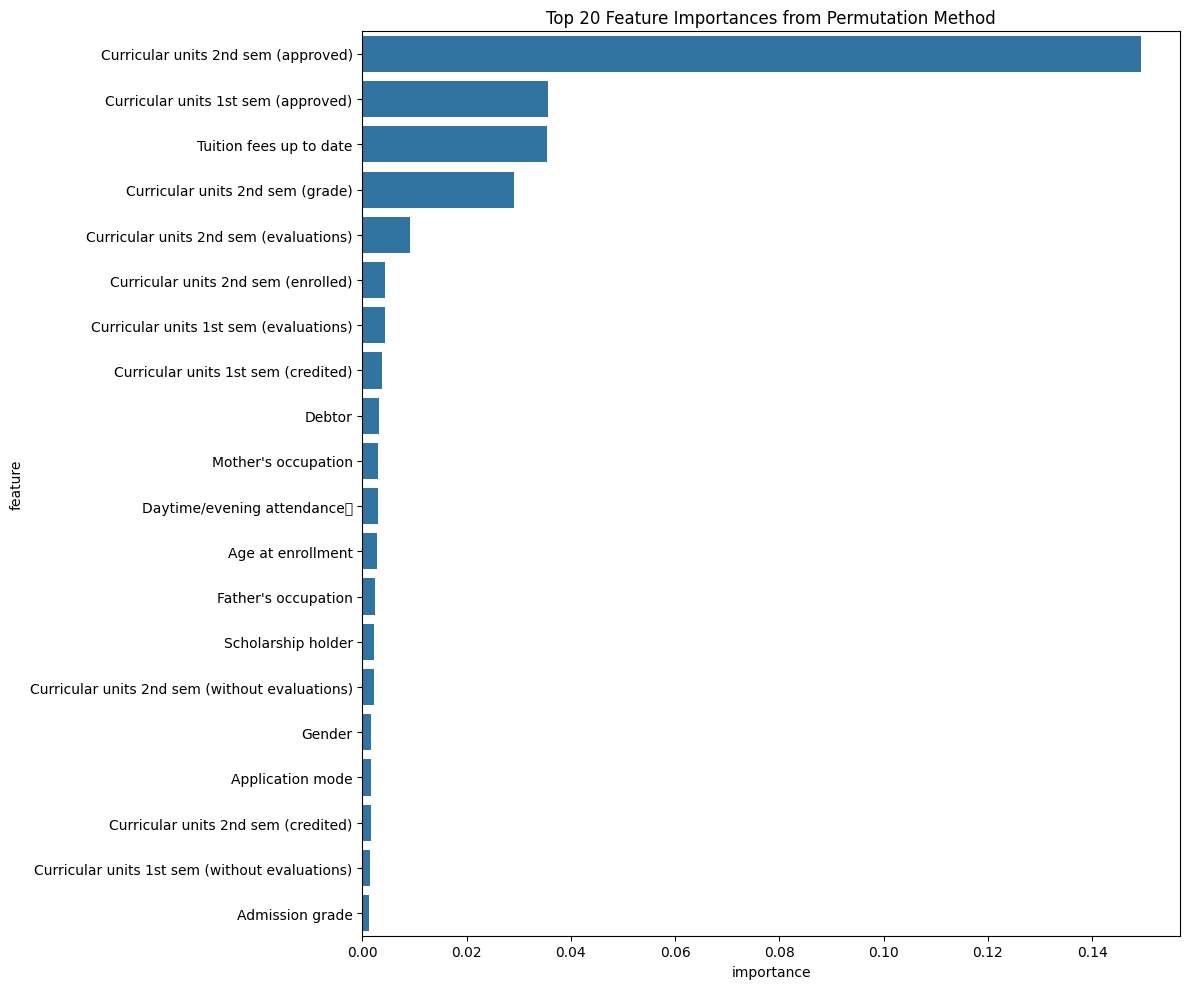


Top 20 features by combined ranking:
                                   feature  importance_rf  importance_perm  \
0      Curricular units 2nd sem (approved)       0.142640         0.149379   
2      Curricular units 1st sem (approved)       0.091928         0.035593   
1         Curricular units 2nd sem (grade)       0.108841         0.029040   
6                  Tuition fees up to date       0.038829         0.035480   
7   Curricular units 2nd sem (evaluations)       0.038382         0.009040   
9   Curricular units 1st sem (evaluations)       0.037058         0.004407   
5                        Age at enrollment       0.040325         0.002825   
16     Curricular units 2nd sem (enrolled)       0.021074         0.004407   
12                     Mother's occupation       0.026044         0.003051   
4                          Admission grade       0.043891         0.001243   
11                     Father's occupation       0.028946         0.002486   
10                        

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset
df = pd.read_csv('data.csv', sep=';')

print(f"Dataset shape: {df.shape}")

# Display actual column names in the dataset
print("\nActual column names in the dataset:")
for col in df.columns:
    print(f"- '{col}'")

# Define feature categories
categorical_features = [
    'Marital status',
    'Application mode',
    'Application order',
    'Course',
    'Previous qualification',
    'Nacionality',
    'Mother\'s qualification',
    'Father\'s qualification',
    'Mother\'s occupation',
    'Father\'s occupation'
]

binary_features = [
    '"Daytime/evening attendance\t"',  # Notice the extra quotes and tab character
    'Displaced',
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder',
    'International'
]

numerical_features = [
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

# Verify all features are in the dataset
all_features = categorical_features + binary_features + numerical_features
missing_features = [f for f in all_features if f not in df.columns]
if missing_features:
    print(f"\nWarning: {len(missing_features)} features not found in the dataset:")
    for f in missing_features:
        print(f"- '{f}'")
    
    # Update feature lists to include only columns that exist in the dataset
    categorical_features = [col for col in categorical_features if col in df.columns]
    binary_features = [col for col in binary_features if col in df.columns]
    numerical_features = [col for col in numerical_features if col in df.columns]

# Separate features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Encode the target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(f"\nTarget classes: {label_encoder.classes_}")

# Display target distribution
target_counts = y.value_counts()
print("\nTarget distribution:")
for target, count in target_counts.items():
    print(f"{target}: {count} ({count/len(y)*100:.2f}%)")

# Function to encode categorical features for Random Forest
def encode_for_tree_model(df, categorical_cols):
    df_encoded = df.copy()
    encoders = {}
    for col in categorical_cols:
        encoder = LabelEncoder()
        # Fit on all values to handle potential unseen classes
        all_values = df[col].unique()
        encoder.fit(all_values)
        df_encoded[col] = encoder.transform(df[col])
        encoders[col] = encoder
    return df_encoded, encoders

# Encode categorical features for tree-based models
X_encoded, encoders = encode_for_tree_model(X, categorical_features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Train a Random Forest classifier for feature selection
print("\nTraining Random Forest for feature selection...")
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Calculate feature importances from Random Forest
feature_importances = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf.feature_importances_
})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Display and plot top 20 important features
top_20_features = feature_importances.head(20)
print("\nTop 20 features by Random Forest importance:")
print(top_20_features)

plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=top_20_features)
plt.title('Top 20 Feature Importances from Random Forest')
plt.tight_layout()
plt.savefig('rf_feature_importance.png')
plt.show()

# Also calculate permutation importance for more reliable feature ranking
print("\nCalculating permutation importance (this may take a while)...")
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Create DataFrame with permutation importance results
perm_importances = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': perm_importance.importances_mean
})
perm_importances = perm_importances.sort_values('importance', ascending=False)

# Display and plot top 20 features by permutation importance
top_20_perm_features = perm_importances.head(20)
print("\nTop 20 features by permutation importance:")
print(top_20_perm_features)

plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=top_20_perm_features)
plt.title('Top 20 Feature Importances from Permutation Method')
plt.tight_layout()
plt.savefig('permutation_feature_importance.png')
plt.show()

# Combine both feature importance methods for a more reliable selection
combined_importance = feature_importances.merge(
    perm_importances, on='feature', suffixes=('_rf', '_perm')
)
combined_importance['combined_rank'] = combined_importance['importance_rf'].rank(ascending=False) + \
                                      combined_importance['importance_perm'].rank(ascending=False)
combined_importance = combined_importance.sort_values('combined_rank')

print("\nTop 20 features by combined ranking:")
top_20_combined = combined_importance.head(20)
print(top_20_combined[['feature', 'importance_rf', 'importance_perm', 'combined_rank']])

# Save the top 20 features to a file
top_20_combined[['feature']].to_csv('top_20_features.csv', index=False)

# Create feature type dictionary for the top 20 features
top_20_features_list = top_20_combined['feature'].tolist()
feature_type_dict = {}

for feature in top_20_features_list:
    if feature in categorical_features:
        feature_type_dict[feature] = 'categorical'
    elif feature in binary_features:
        feature_type_dict[feature] = 'binary'
    else:
        feature_type_dict[feature] = 'numerical'

# Display feature types for top 20 features
print("\nFeature types for top 20 features:")
for feature, feature_type in feature_type_dict.items():
    print(f"- {feature}: {feature_type}")

# Save feature types to file
feature_types_df = pd.DataFrame([
    {'feature': feature, 'feature_type': feature_type} 
    for feature, feature_type in feature_type_dict.items()
])
feature_types_df.to_csv('top_20_feature_types.csv', index=False)

print("\nFeature selection complete. Top 20 features saved to 'top_20_features.csv'")
print("Feature types for top 20 features saved to 'top_20_feature_types.csv'")
print("\nYou can now manually select features from this list for your deep learning model.")